In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data_type = {
    '_CustomerID': str 
}

In [4]:
sales_data = pd.read_csv('sales_data.csv', dtype = data_type, parse_dates=['OrderDate'])

In [5]:
sales_data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,2018-05-31,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,2018-05-31,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,2018-05-31,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,2018-05-31,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,2018-05-31,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [6]:
df = sales_data.copy()

In [7]:
df['Revenue'] = (df['Unit Price'] - df['Unit Cost']) * (1 - df['Discount Applied']) * df['Order Quantity']

In [8]:
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate                object
OrderDate           datetime64[ns]
ShipDate                    object
DeliveryDate                object
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                 object
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
Revenue                    float64
dtype: object

In [9]:
columns_to_use = ['_CustomerID', 'OrderDate', 'Revenue', 'OrderNumber']

In [10]:
df2 = df[columns_to_use]

In [11]:
max_date =  pd.to_datetime('2020-12-30')

In [12]:
RFM_dataset = df2.groupby('_CustomerID').agg({
    'OrderDate': lambda x: (max_date - x.max()).days,
    'OrderNumber': 'count',
    'Revenue': 'sum'
    }).reset_index()

In [13]:
RFM_dataset

,_CustomerID,OrderDate,OrderNumber,Revenue
0,1,7,152,432755.708475
1,10,13,158,555864.221975
2,11,4,178,627510.001975
3,12,1,210,765837.632475
4,13,2,171,569885.362225
5,14,3,157,494928.767175
6,15,2,142,539306.233925
7,16,1,135,514704.922675
8,17,4,175,652958.911800
9,18,4,186,590287.162050


In [14]:
RFM_dataset.rename(
    columns={
    'OrderDate': 'Recency',
    'OrderNumber': 'Frequency',
    'Revenue': 'Monetary'
}, 
inplace=True)


In [15]:
# Apply qcut to segment customers into 4 quantile-based groups (1-4)
RFM_dataset['R_Segment'] = pd.qcut(RFM_dataset['Recency'], q=4, labels=[4, 3, 2, 1], duplicates='drop')
RFM_dataset['F_Segment'] = pd.qcut(RFM_dataset['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4], duplicates='drop')
RFM_dataset['M_Segment'] = pd.qcut(RFM_dataset['Monetary'].rank(method='first'), q=4, labels=[1, 2, 3, 4], duplicates='drop')

In [16]:
# Create RFM score by concatenating the segments
RFM_dataset['RFM_Score'] = RFM_dataset['R_Segment'].astype(str) + RFM_dataset['F_Segment'].astype(str) + RFM_dataset['M_Segment'].astype(str)

In [17]:
RFM_dataset.head(10)

,_CustomerID,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
0,1,7,152,432755.708475,2,2,1,221
1,10,13,158,555864.221975,1,3,3,133
2,11,4,178,627510.001975,2,4,4,244
3,12,1,210,765837.632475,4,4,4,444
4,13,2,171,569885.362225,4,4,3,443
5,14,3,157,494928.767175,3,2,1,321
6,15,2,142,539306.233925,4,1,2,412
7,16,1,135,514704.922675,4,1,2,412
8,17,4,175,652958.911800,2,4,4,244
9,18,4,186,590287.162050,2,4,3,243


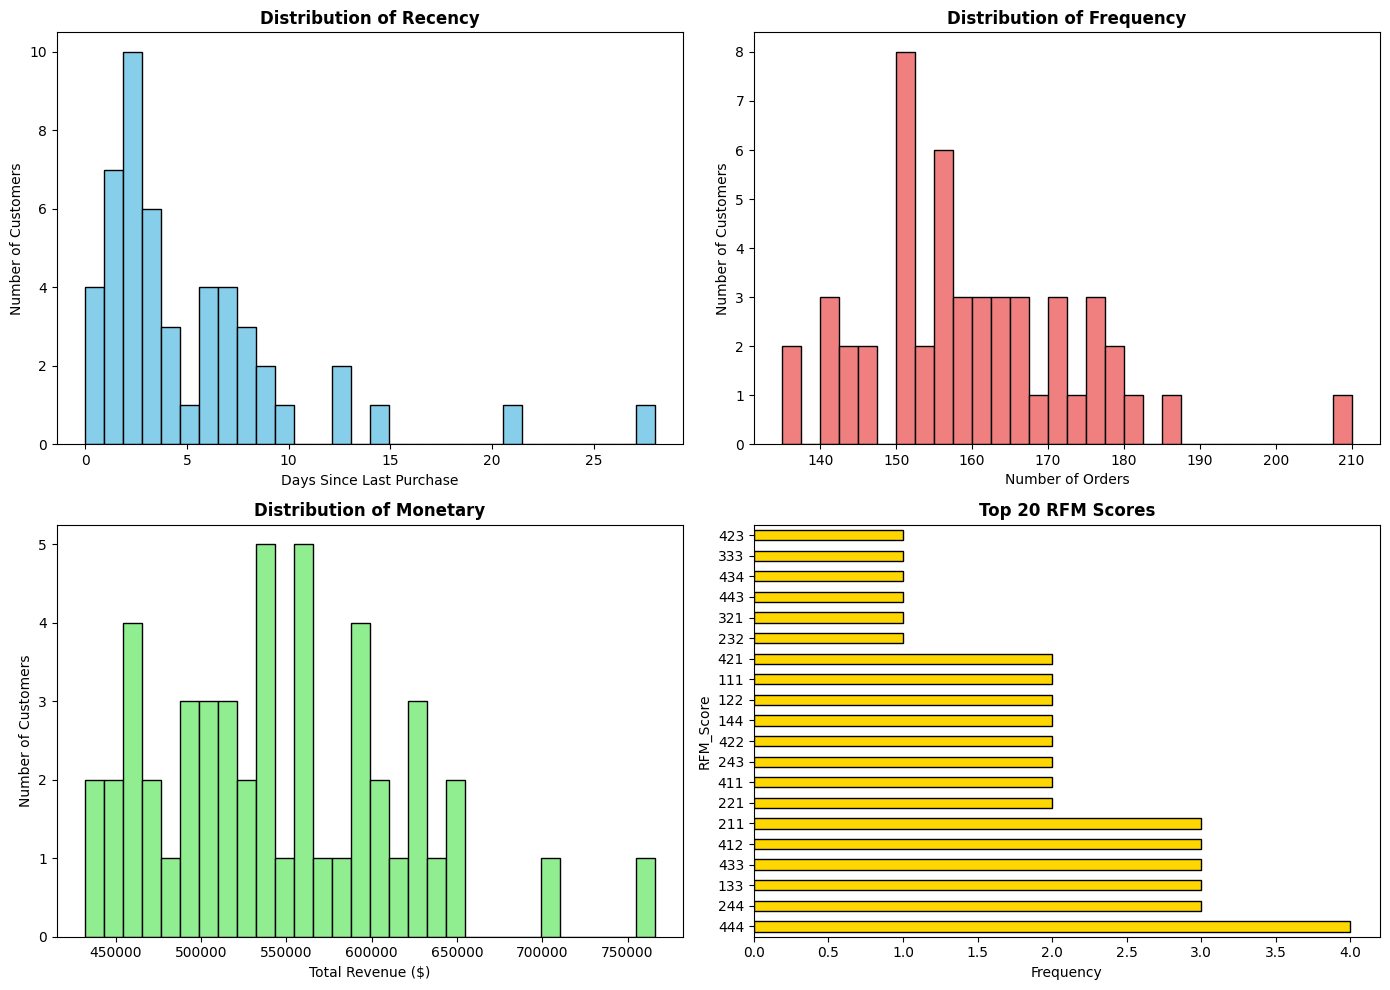

In [18]:
# Create visualizations for RFM segments
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Recency
axes[0, 0].hist(RFM_dataset['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Recency', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Days Since Last Purchase')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Distribution of Frequency
axes[0, 1].hist(RFM_dataset['Frequency'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Number of Customers')

# 3. Distribution of Monetary
axes[1, 0].hist(RFM_dataset['Monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of Monetary', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Total Revenue ($)')
axes[1, 0].set_ylabel('Number of Customers')

# 4. RFM Score Distribution
RFM_dataset['RFM_Score'].value_counts().head(20).plot(kind='barh', ax=axes[1, 1], color='gold', edgecolor='black')
axes[1, 1].set_title('Top 20 RFM Scores', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
# Summary statistics
print("RFM Dataset Summary Statistics:")
print(RFM_dataset[['Recency', 'Frequency', 'Monetary']].describe())

RFM Dataset Summary Statistics:
         Recency  Frequency       Monetary
count  50.000000   50.00000      50.000000
mean    5.100000  159.82000  545828.049703
std     5.395576   14.23088   71342.534244
min     0.000000  135.00000  432058.139650
25%     2.000000  151.25000  495598.572456
50%     3.000000  157.50000  540133.027325
75%     7.000000  167.75000  595148.423681
max    28.000000  210.00000  765837.632475
